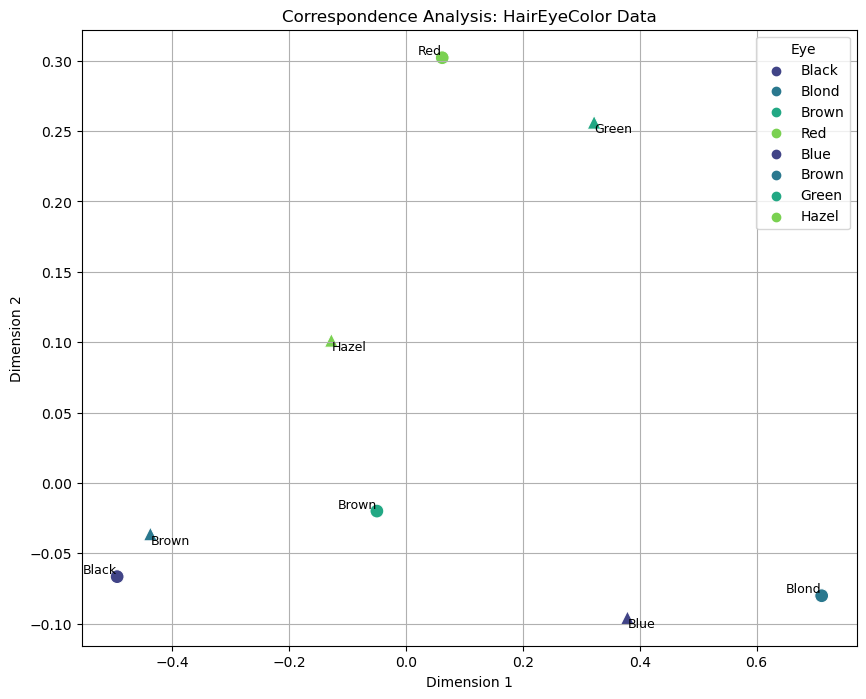

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd

# Load the HairEyeColor dataset
data = {
    'Hair': ['Black', 'Brown', 'Red', 'Blond', 'Black', 'Brown', 'Red', 'Blond', 'Black', 'Brown', 'Red', 'Blond', 'Black', 'Brown', 'Red', 'Blond'],
    'Eye': ['Brown', 'Brown', 'Brown', 'Brown', 'Blue', 'Blue', 'Blue', 'Blue', 'Hazel', 'Hazel', 'Hazel', 'Hazel', 'Green', 'Green', 'Green', 'Green'],
    'Freq': [32, 53, 10, 3, 11, 50, 10, 30, 10, 25, 7, 5, 3, 15, 7, 8]
}

hair_eye = pd.DataFrame(data)
contingency_table = hair_eye.pivot_table(values='Freq', index='Hair', columns='Eye', fill_value=0)

# Correspondence Analysis
def correspondence_analysis(table):
    table = table.values
    n = np.sum(table)
    P = table / n
    r = np.sum(P, axis=1)
    c = np.sum(P, axis=0)
    R = np.diag(r)
    C = np.diag(c)
    S = P - np.outer(r, c)
    R_inv_sqrt = np.linalg.inv(np.sqrt(R))
    C_inv_sqrt = np.linalg.inv(np.sqrt(C))
    Z = R_inv_sqrt @ S @ C_inv_sqrt
    U, D, Vt = svd(Z, full_matrices=False)
    F = R_inv_sqrt @ U @ np.diag(D)
    G = C_inv_sqrt @ Vt.T @ np.diag(D)
    return F, G, D

F, G, D = correspondence_analysis(contingency_table)

row_coords = pd.DataFrame(F[:, :2], columns=['Dim1', 'Dim2'])
row_coords['Hair'] = contingency_table.index

col_coords = pd.DataFrame(G[:, :2], columns=['Dim1', 'Dim2'])
col_coords['Eye'] = contingency_table.columns

# Plot the correspondence analysis results using matplotlib and seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=row_coords, x='Dim1', y='Dim2', hue='Hair', s=100, palette='viridis', legend='full', marker='o')
sns.scatterplot(data=col_coords, x='Dim1', y='Dim2', hue='Eye', s=100, palette='viridis', legend='full', marker='^')

for i, row in row_coords.iterrows():
    plt.text(row['Dim1'], row['Dim2'], row['Hair'], fontsize=9, ha='right', va='bottom')
for i, row in col_coords.iterrows():
    plt.text(row['Dim1'], row['Dim2'], row['Eye'], fontsize=9, ha='left', va='top')

plt.title('Correspondence Analysis: HairEyeColor Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()